# Challenge AP

## Dataset

### Description 

Nous utiliserons le dataset "Company Success Prediction" de scikit-learn qui contient des informations sur 1000 startups tech avec leur statut après 5 ans (Succès/Échec/Acquisition).  
`startup_success_data.csv`

Le dataset contient les colonnes suivantes : 
- **funding_rounds** : Nombre de levées de fonds 
- **total_funding** : Montant total levé 
- **team_size** : Taille de l'équipe au lancement 
- **tech_stack_size** : Nombre de technologies utilisées 
- **patents** : Nombre de brevets déposés 
- **burned_rate** : Taux de consommation du capital mensuel 
- **revenue_growth** : Croissance du chiffre d'affaires (%) 
- **market_size** : Taille du marché ciblé (en millions $) 
- **competitors** : Nombre de concurrents directs 
- **social_media_score** : Score d'engagement sur les réseaux sociaux 
- **client_retention** : Taux de rétention client (%) 
- **pivot_count** : Nombre de pivots stratégiques 
- **regulatory_score** : Score de conformité réglementaire 

Variable cible (status) : 
- **0** : Échec (60% des cas) 
- **1** : Succès (25% des cas) 
- **2** : Acquisition (15% des cas) 

Particularités du dataset : 
- 20% de valeurs manquantes dans `revenue_growth` et `client_retention` 
- Classes déséquilibrées 
- Outliers dans `total_funding` et `team_size`

In [40]:
import pandas as pd

df = pd.read_csv('startup_success_data.csv')
df.head()

funding_rounds  total_funding  team_size  tech_stack_size   patents  \
0        2.635789  -6.259407e+06         18        -0.188664  1.432129   
1        0.468051  -6.372538e+06         -6         6.393478  3.758335   
2        1.853692  -3.723211e+06          8         1.655535  1.993431   
3        1.690547   2.298397e+06         -6         3.026151  2.402553   
4       -2.089758   2.712542e+06        -36         2.337657  3.370167   

   burned_rate  revenue_growth   market_size  competitors  social_media_score  \
0     0.623095       -1.625289 -3.286777e+06     0.181854           -0.005083   
1    -2.712422             NaN  9.778400e+04    -3.264116           -1.167660   
2     0.819204       -1.330146 -1.354409e+06     1.197189           -1.498869   
3     5.074848        2.071084 -2.371742e+06     0.446803            0.248394   
4    -4.097354        4.401355  3.225830e+06     1.007868           -0.094696   

   pivot_count  regulatory_score  client_retention  status  
0            1         57.916175         47.027075       2  
1            3         51.012632         72.810493       0  
2            0         12.772154         40.662497       1  
3            0         98.758329         42.734878       0  
4            3         65.968527         56.580872       2

In [41]:
df.tail(20)

funding_rounds  total_funding  team_size  tech_stack_size   patents  \
980       -0.063695   2.576300e+06         -7         2.707662  1.658604   
981        3.332442  -3.162872e+06          5        -2.239479  0.414206   
982       -0.773598  -3.487435e+05         31        -0.791477 -0.891911   
983       -0.952838  -3.231815e+06          1         2.579936  5.052636   
984       -0.360687   2.216963e+06         -6         3.813669  1.949938   
985        3.158060  -4.521156e+06         20        -0.583112  1.238766   
986       -3.023404  -4.267120e+06         13         0.424725 -0.105091   
987       -0.261512   3.107864e+06         20        -1.901324  1.819917   
988       -2.671886  -1.255570e+06         23         1.145629 -0.064855   
989       -2.560165   2.446994e+06         23        -5.093698 -0.137521   
990       -0.755923   3.624788e+06        -20         2.346822 -0.376117   
991       -0.600333   1.970403e+06         14        -2.750836 -0.301358   
992       -4.880115   5.108926e+06          8        -2.977921 -1.169239   
993        4.915352  -3.900477e+06          6         1.693484  2.286901   
994       -1.663989   4.390838e+06         -5        -0.095082 -1.690575   
995       -0.893493   1.976683e+06         12        -4.708086 -1.554201   
996       -1.749852   8.426095e+05          8        -1.853890 -0.043425   
997        1.986286  -3.577158e+06         -4         4.538140  2.461129   
998       -0.817361  -4.432734e+06         30         1.017003  0.341237   
999       -1.362098   2.927775e+06         -9         4.191839  1.462739   

     burned_rate  revenue_growth   market_size  competitors  \
980     1.158857        2.280898  5.579189e+05     1.085856   
981     0.072693        0.707977 -2.593915e+06     2.124457   
982     0.433064        0.266334 -7.763411e+05    -2.483822   
983    -3.440986        3.552494  1.747740e+05    -1.645426   
984     3.205914        1.882788 -1.028601e+06    -1.795434   
985     0.885358             NaN -1.731075e+06     0.258609   
986    -2.554763       -0.512023 -2.327715e+06    -1.999767   
987     0.037380        0.200094  2.902912e+06     1.283431   
988     0.541078       -0.464138 -2.248923e+06    -0.463617   
989    -1.209495        1.537422 -3.380778e+05     0.246060   
990     2.259484        1.207766 -4.967688e+05     0.696227   
991    -0.206909        0.494048  8.095344e+05    -1.043927   
992    -3.068072        3.226117  1.453286e+06     1.567105   
993     0.625336             NaN -1.104634e+05    -0.614448   
994     0.210735        2.899791  1.426749e+05    -0.057818   
995    -0.913780       -0.212132  2.297050e+05     2.108681   
996    -4.295271        1.863680  2.846129e+06    -1.105288   
997     0.003121       -0.519809  3.724898e+05    -0.706835   
998    -1.610902       -0.850392 -1.205685e+06     0.110257   
999     1.013591        1.632247  1.124365e+06     0.807721   

     social_media_score  pivot_count  regulatory_score  client_retention  \
980           -2.450315            4         30.784235               NaN   
981           -1.772596            4         27.589692         77.432611   
982            0.642918            1         82.089876         46.619148   
983            0.968036            4         93.014582               NaN   
984            1.771781            4         63.446378         76.564073   
985           -0.425594            2         50.031605         35.506783   
986            1.638765            2         16.118878         78.632152   
987            1.072265            1         37.388870         96.774600   
988           -0.742308            3         78.801741         83.245790   
989            3.690879            4          3.008155         39.142103   
990           -0.384612            3         10.350178               NaN   
991            3.423472            1          1.176021         43.891436   
992           -1.072019            2         59.044507               NaN   
993           -1.928

## EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   funding_rounds      1000 non-null   float64
 1   total_funding       1000 non-null   float64
 2   team_size           1000 non-null   int64  
 3   tech_stack_size     1000 non-null   float64
 4   patents             1000 non-null   float64
 5   burned_rate         1000 non-null   float64
 6   revenue_growth      784 non-null    float64
 7   market_size         1000 non-null   float64
 8   competitors         1000 non-null   float64
 9   social_media_score  1000 non-null   float64
 10  pivot_count         1000 non-null   int64  
 11  regulatory_score    1000 non-null   float64
 12  client_retention    820 non-null    float64
 13  status              1000 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 109.5 KB


In [3]:
df.isnull().sum()

funding_rounds          0
total_funding           0
team_size               0
tech_stack_size         0
patents                 0
burned_rate             0
revenue_growth        216
market_size             0
competitors             0
social_media_score      0
pivot_count             0
regulatory_score        0
client_retention      180
status                  0
dtype: int64

In [4]:
df.nunique()

funding_rounds        1000
total_funding         1000
team_size              120
tech_stack_size       1000
patents               1000
burned_rate           1000
revenue_growth         784
market_size           1000
competitors           1000
social_media_score    1000
pivot_count              5
regulatory_score      1000
client_retention       820
status                   3
dtype: int64

In [5]:
df.describe().style.format("{:.2f}")

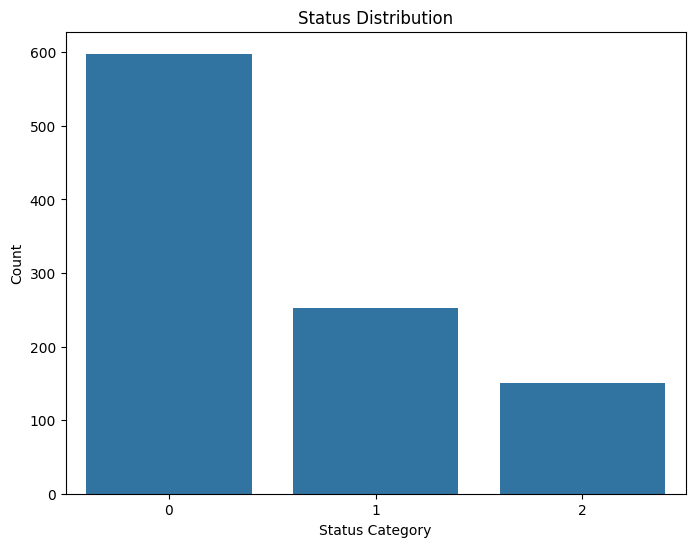

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

# Count plot for the income attribute
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status')
plt.title('Status Distribution')
plt.xlabel('Status Category')
plt.ylabel('Count')
plt.show()

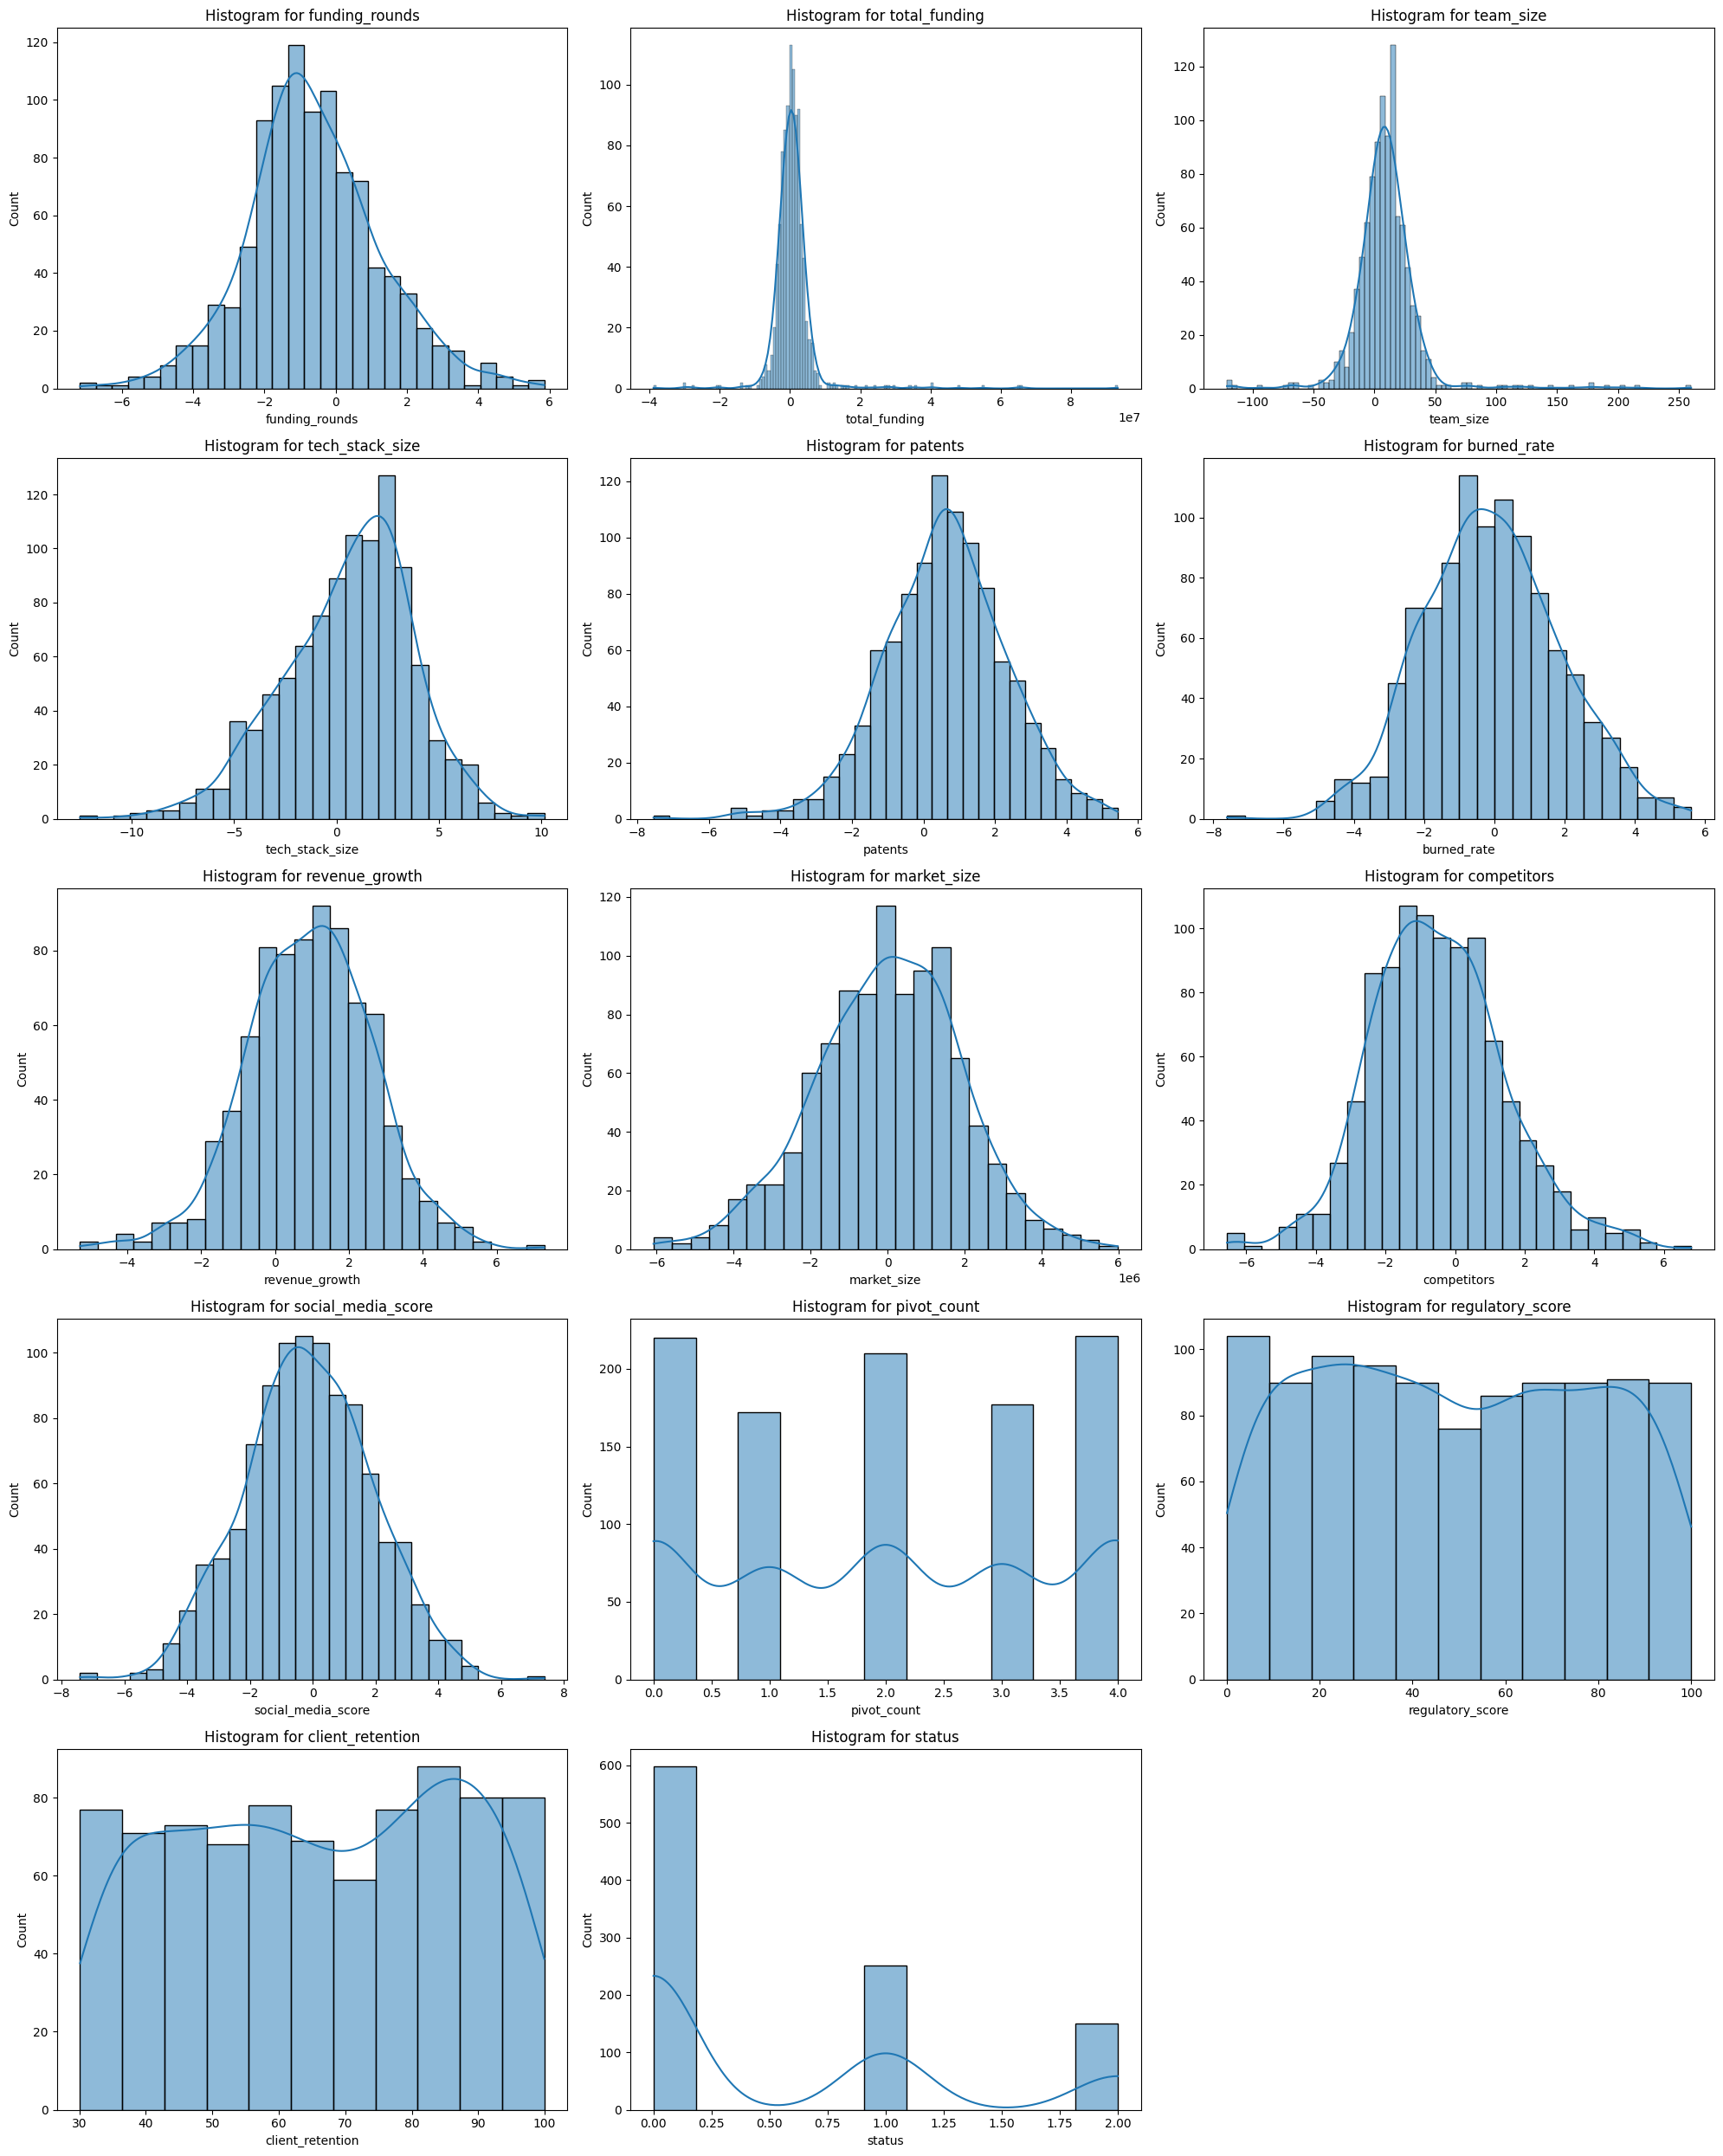

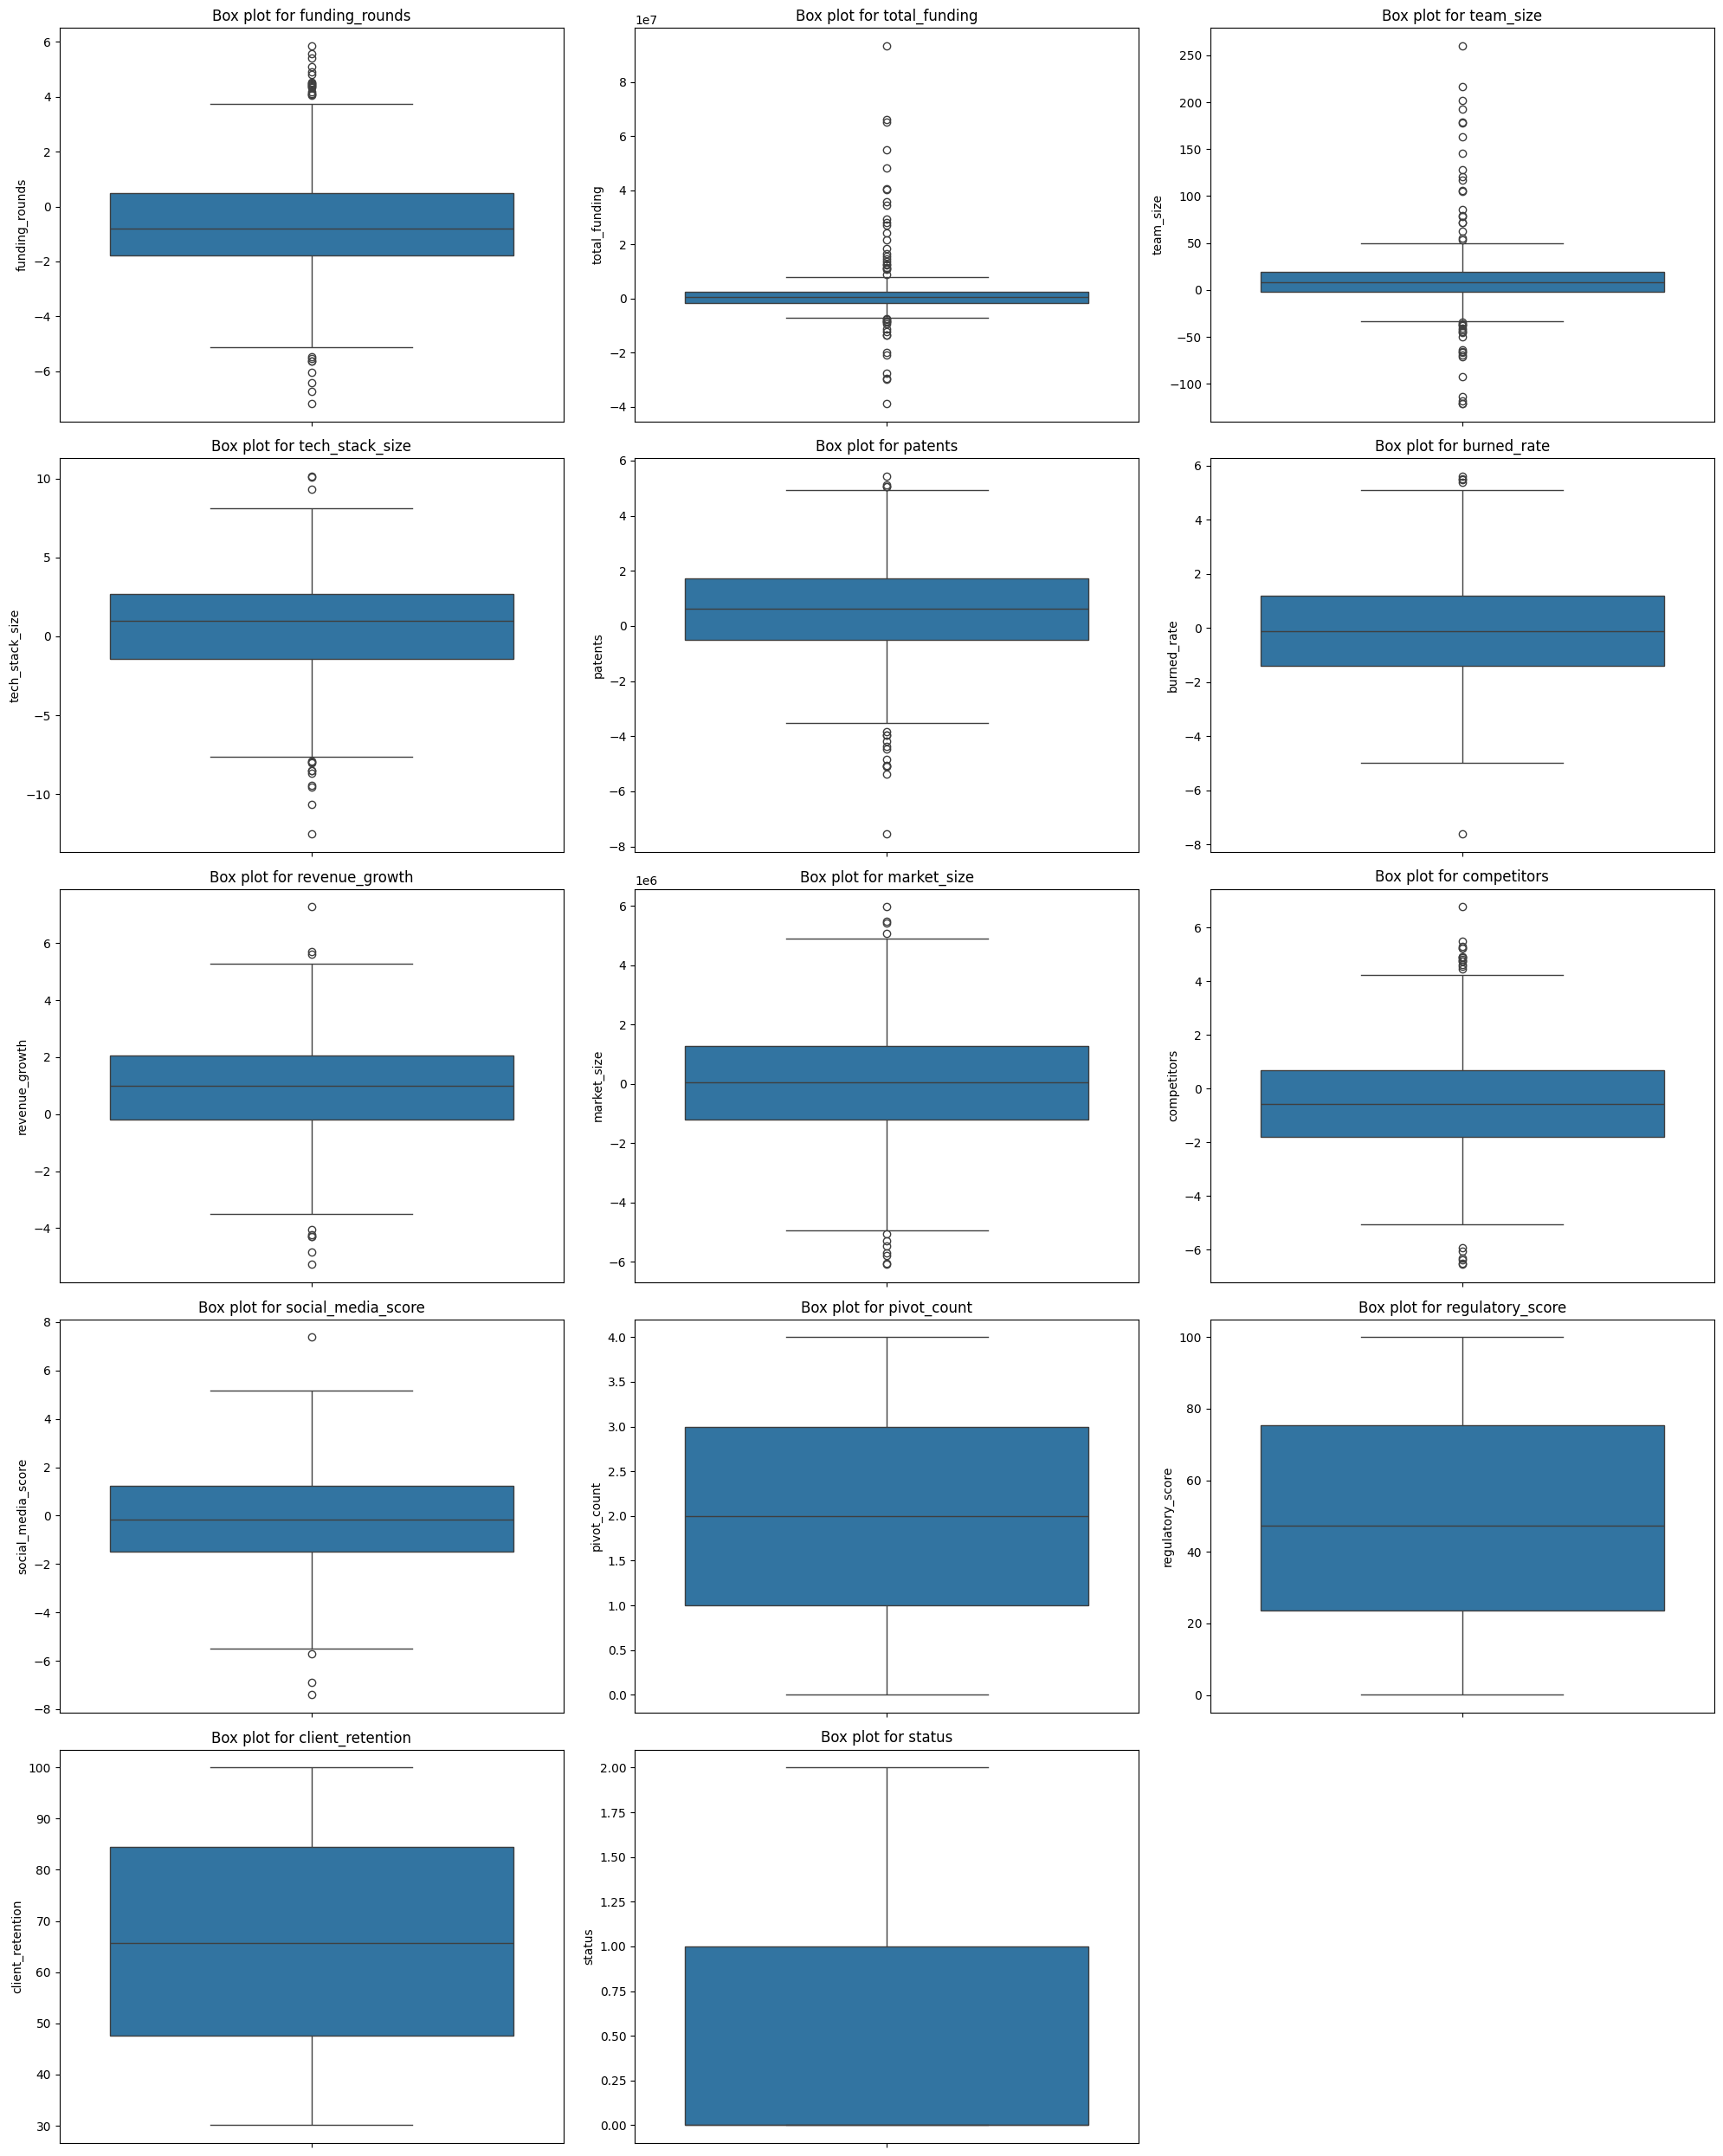

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed
num_columns = len(numerical_columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

# Plot histograms for each numerical column
plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram for {column}')
plt.tight_layout()
plt.show()

# Plot box plots for each numerical column
plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(data=df[column])
    plt.title(f'Box plot for {column}')
plt.tight_layout()
plt.show()

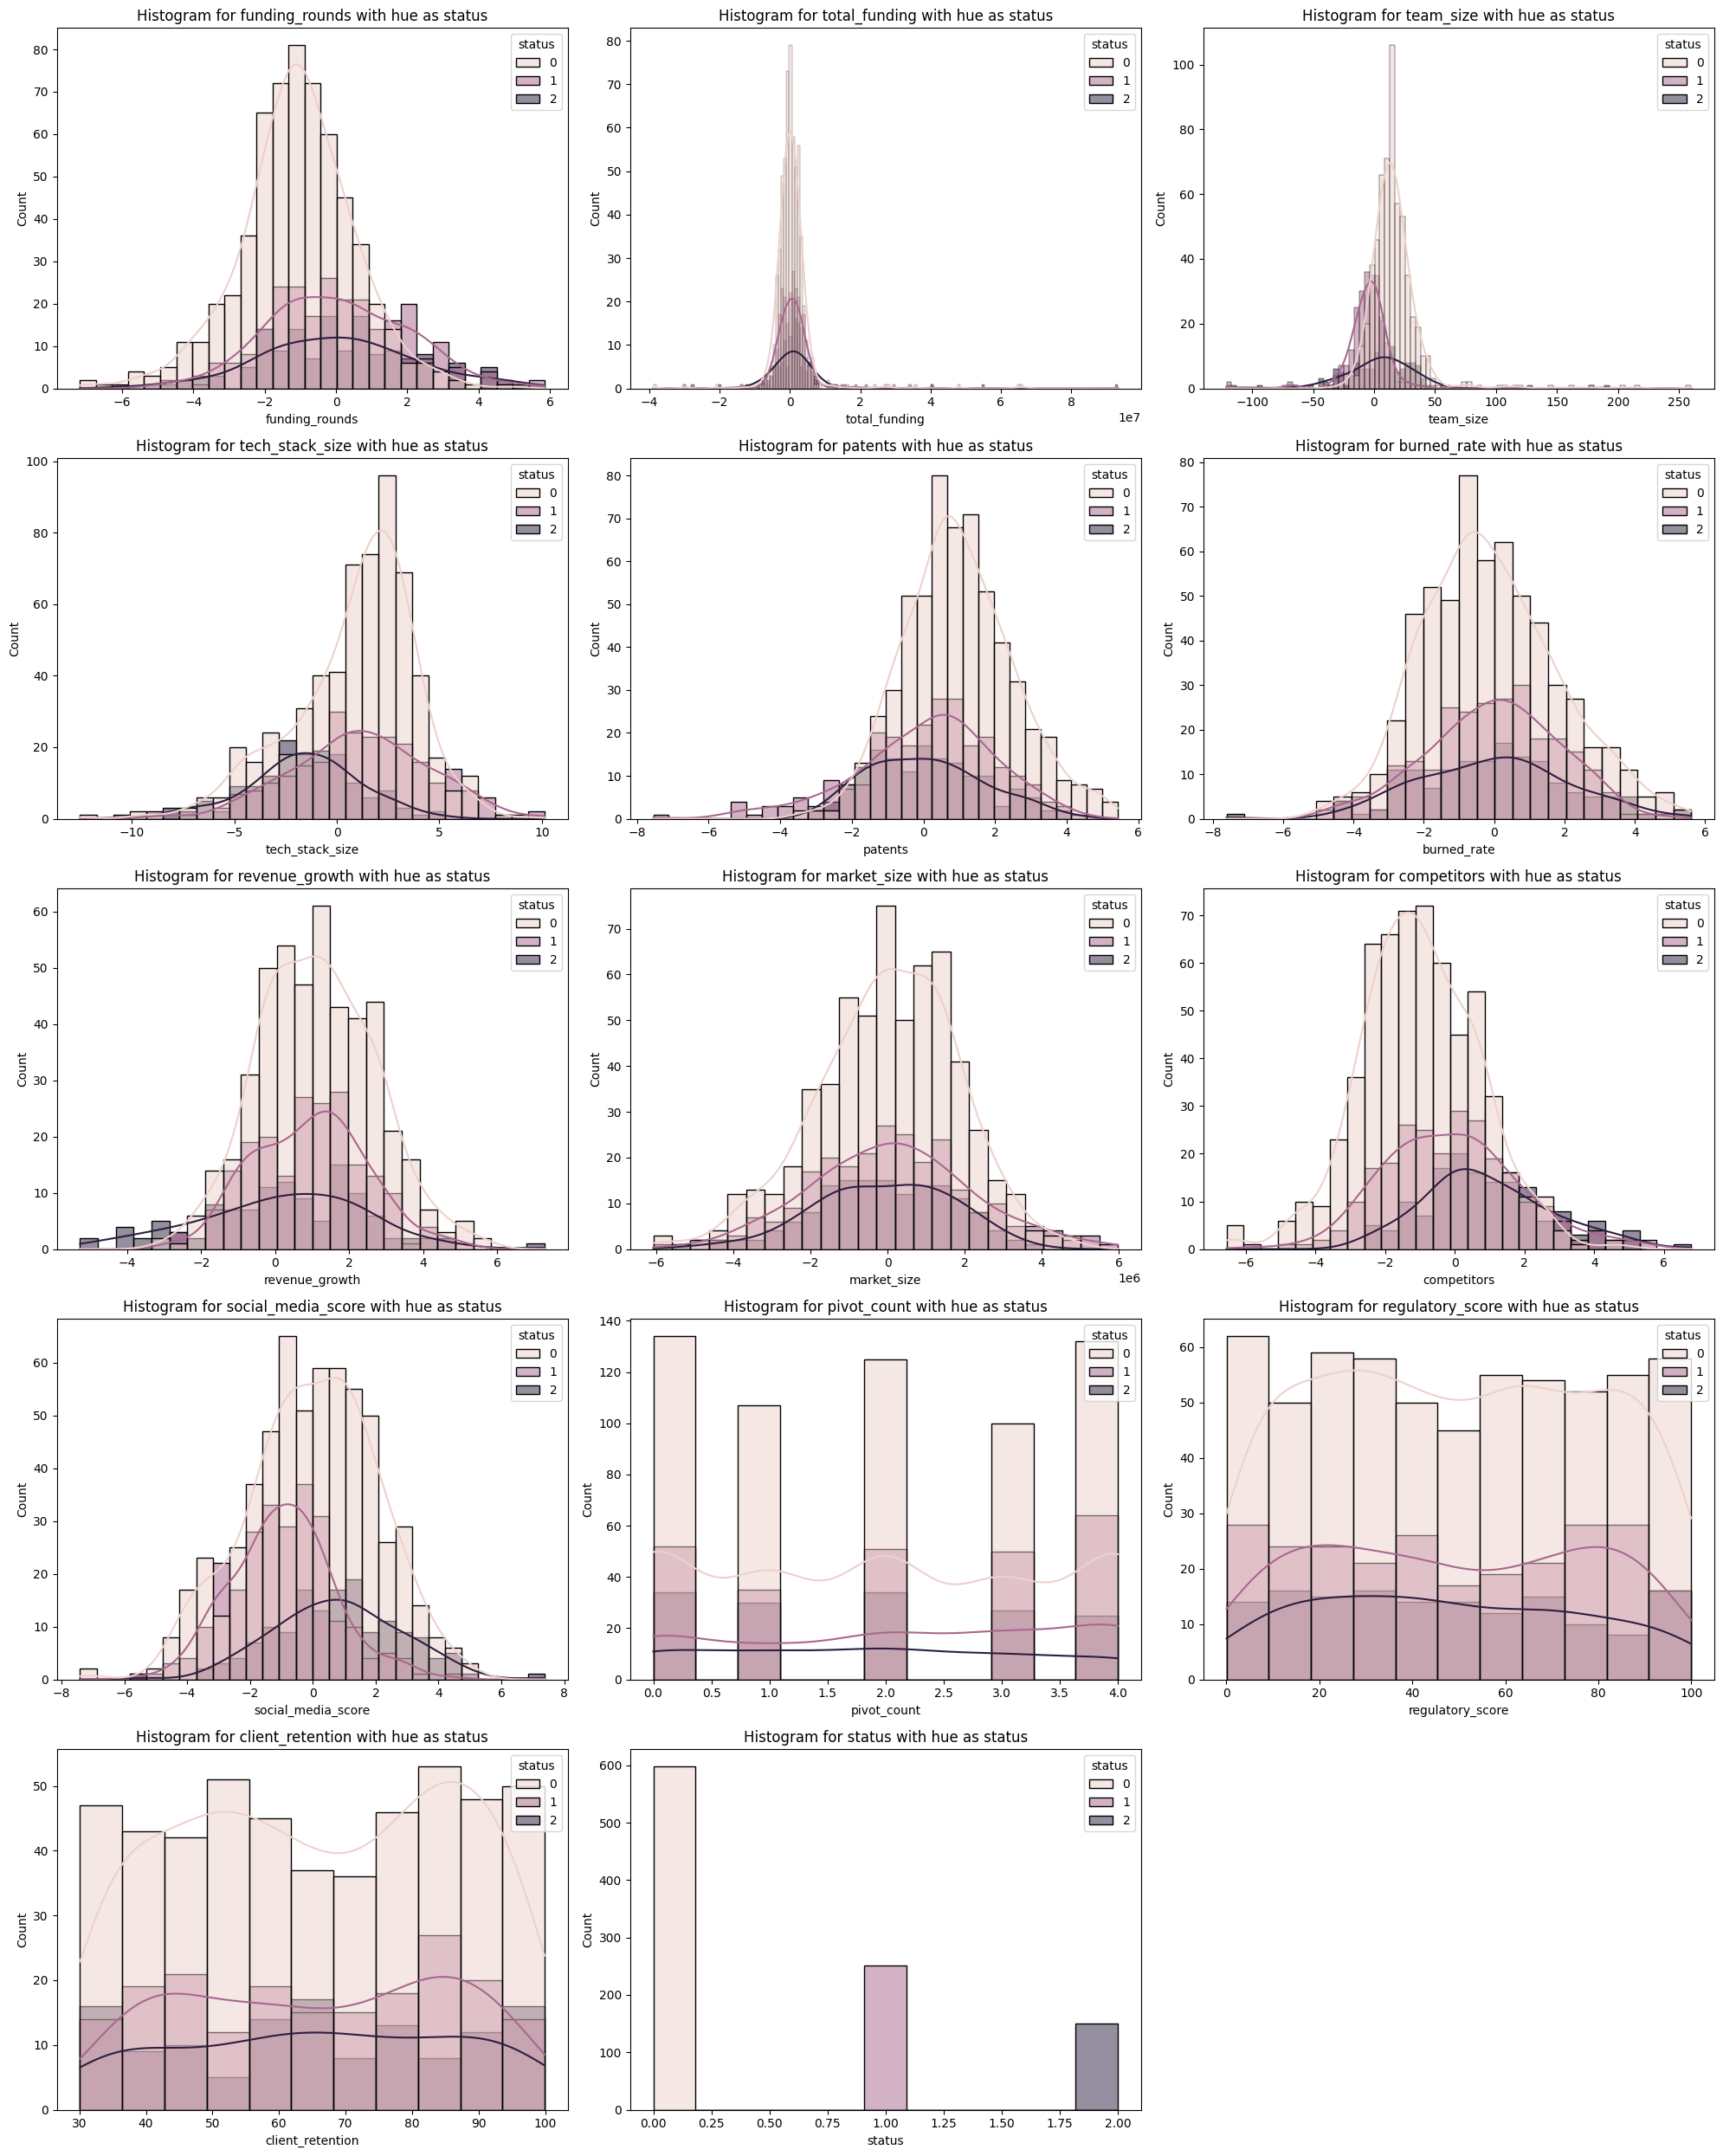

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed
num_columns = len(numerical_columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

# Visualize numerical columns with hue as status
plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data=df, x=column, hue='status', kde=True)
    plt.title(f'Histogram for {column} with hue as status')
plt.tight_layout()
plt.show()

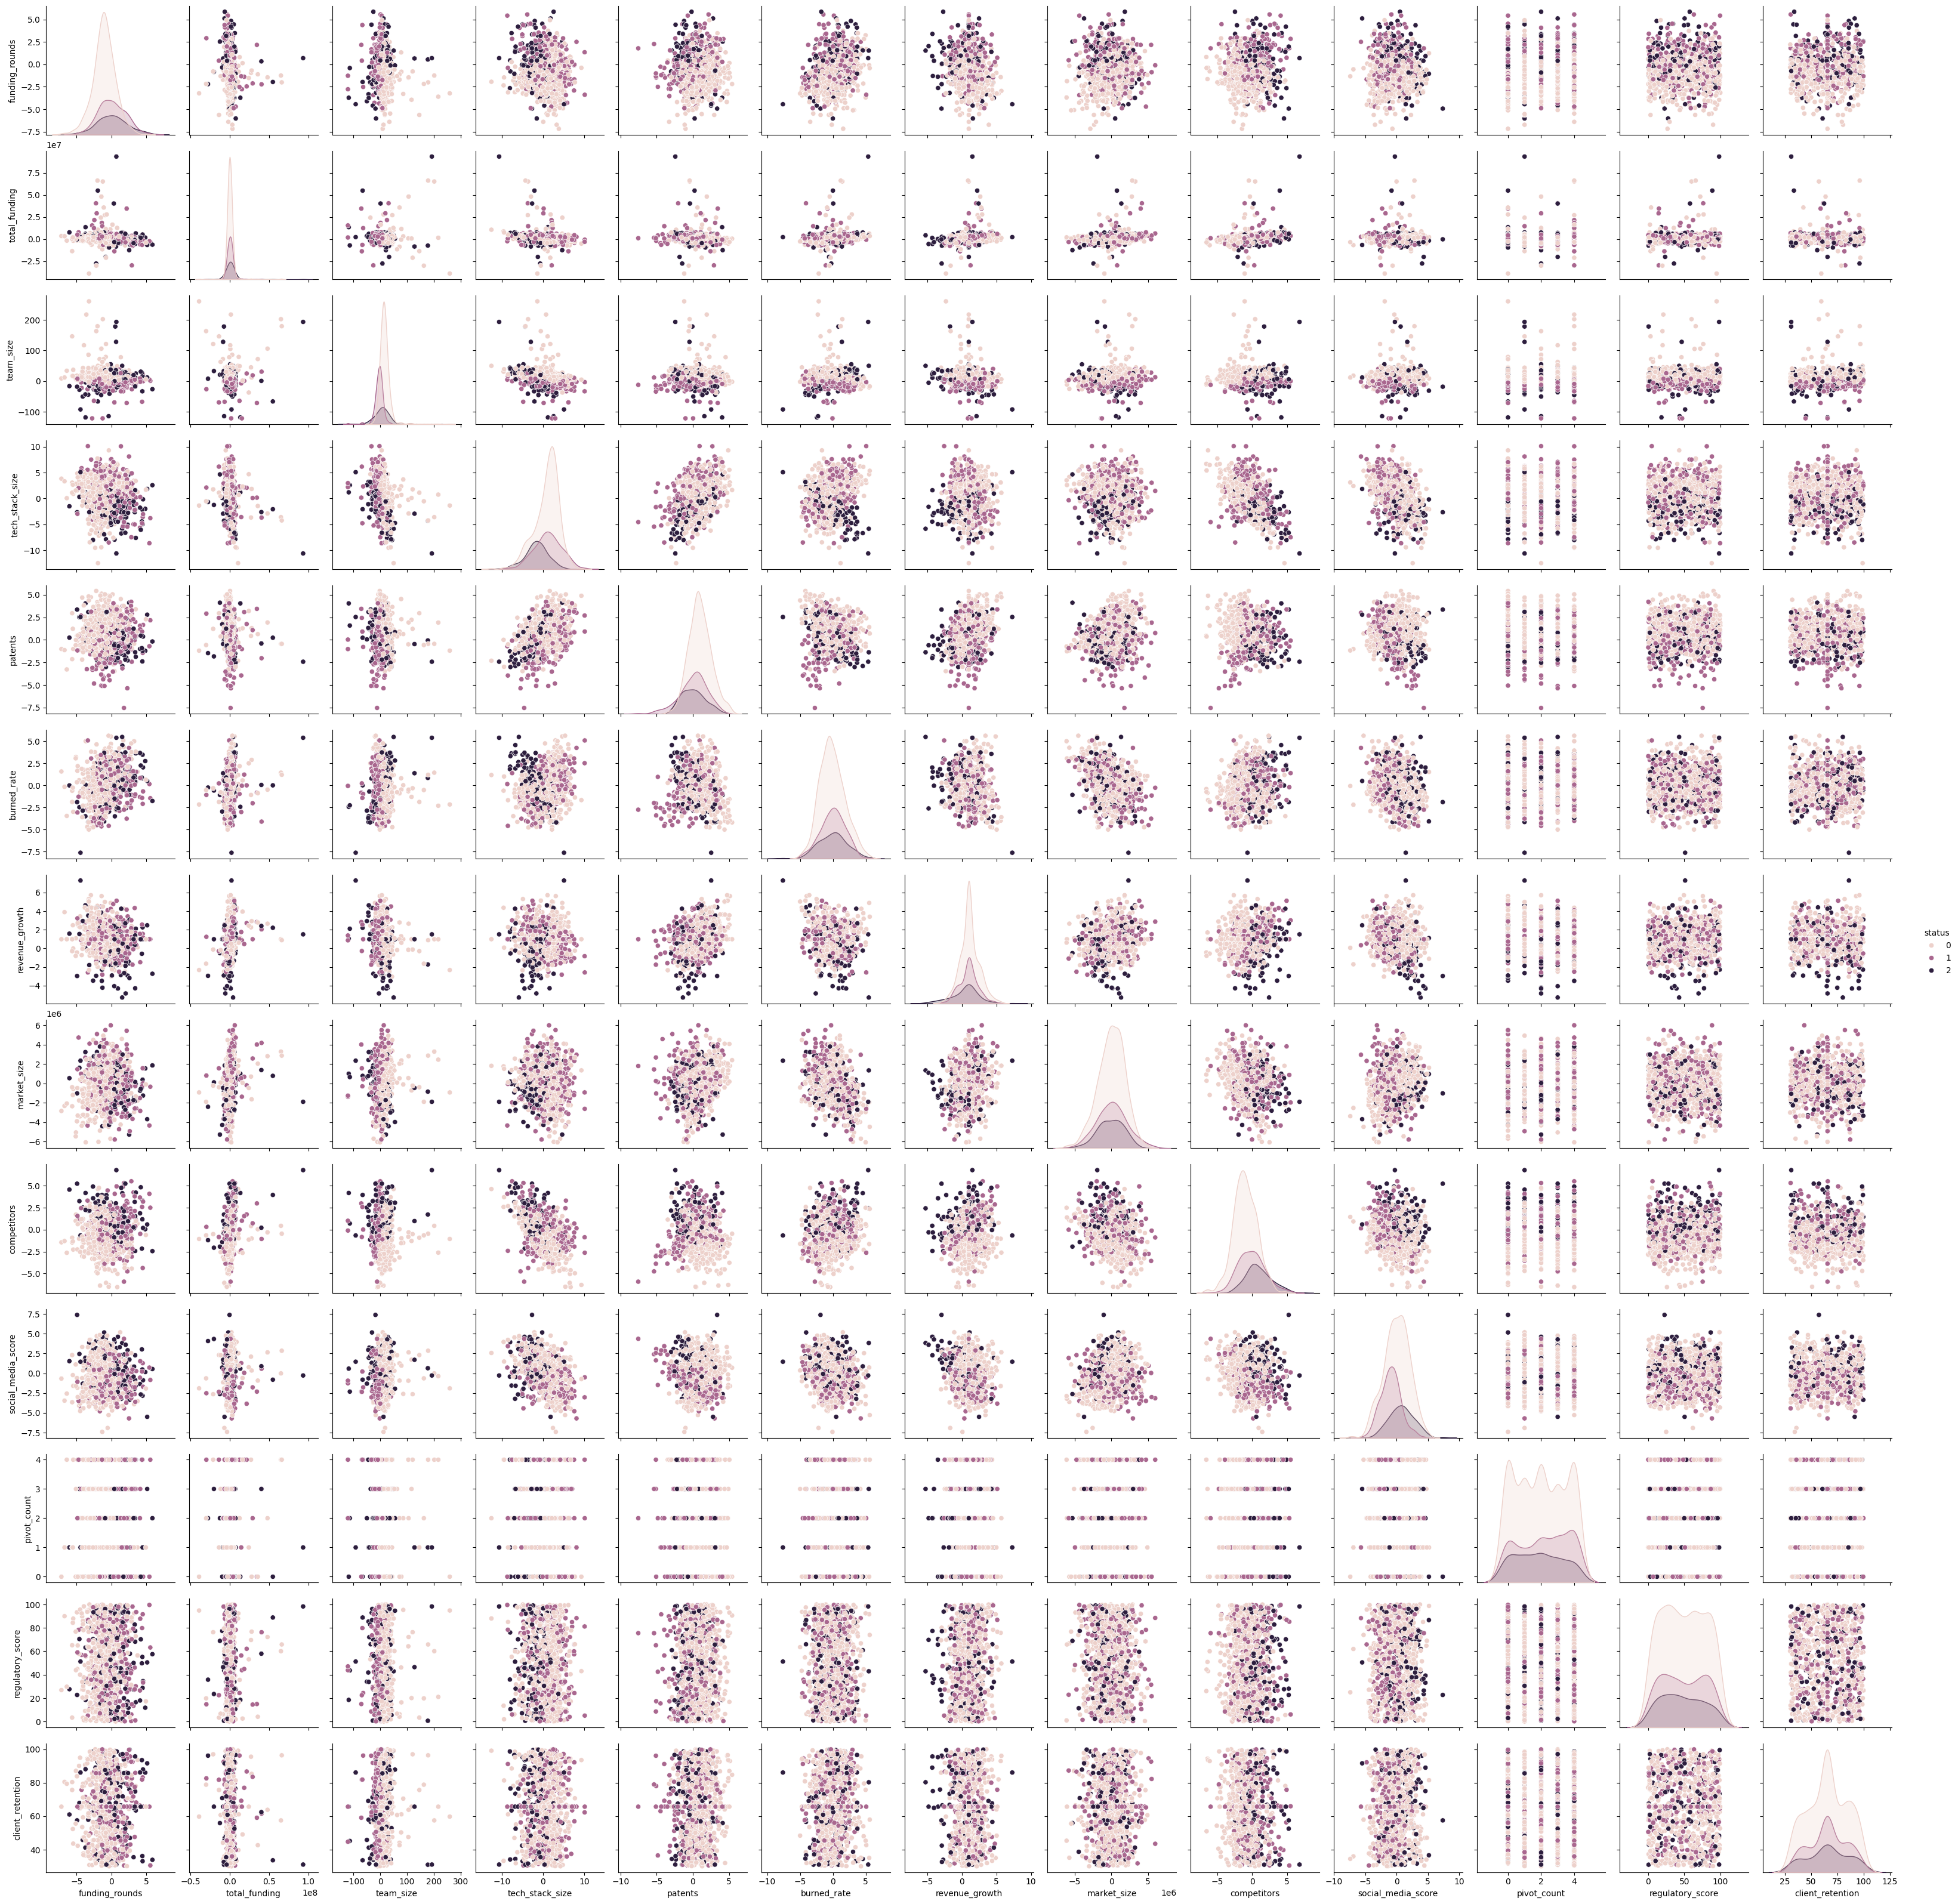

In [15]:
# Pairplot for selected features
sns.pairplot(df, hue='status')
plt.show()

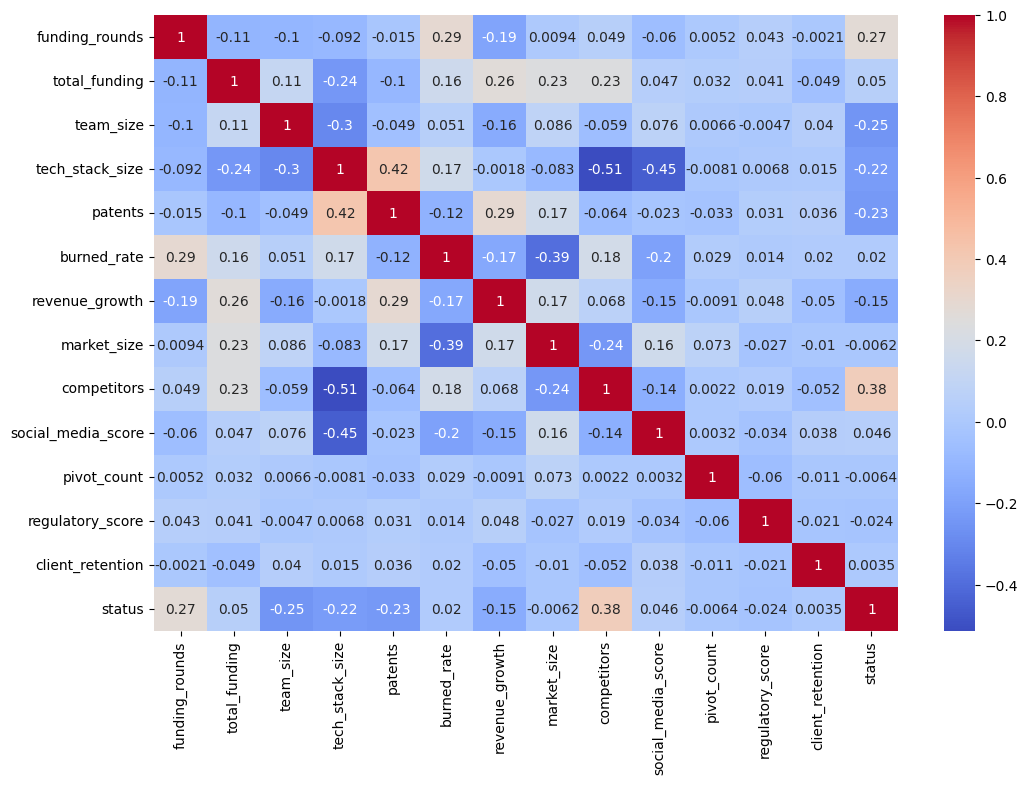

In [13]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Preprocessing

### Handling Missing Values

In [10]:
# Impute missing values with the median
df['revenue_growth'].fillna(df['revenue_growth'].median(), inplace=True)
df['client_retention'].fillna(df['client_retention'].median(), inplace=True)

# Verify that there are no missing values
df.isnull().sum()

funding_rounds        0
total_funding         0
team_size             0
tech_stack_size       0
patents               0
burned_rate           0
revenue_growth        0
market_size           0
competitors           0
social_media_score    0
pivot_count           0
regulatory_score      0
client_retention      0
status                0
dtype: int64

In [11]:
df.head()

funding_rounds  total_funding  team_size  tech_stack_size   patents  \
0        2.635789  -6.259407e+06         18        -0.188664  1.432129   
1        0.468051  -6.372538e+06         -6         6.393478  3.758335   
2        1.853692  -3.723211e+06          8         1.655535  1.993431   
3        1.690547   2.298397e+06         -6         3.026151  2.402553   
4       -2.089758   2.712542e+06        -36         2.337657  3.370167   

   burned_rate  revenue_growth   market_size  competitors  social_media_score  \
0     0.623095       -1.625289 -3.286777e+06     0.181854           -0.005083   
1    -2.712422        0.984511  9.778400e+04    -3.264116           -1.167660   
2     0.819204       -1.330146 -1.354409e+06     1.197189           -1.498869   
3     5.074848        2.071084 -2.371742e+06     0.446803            0.248394   
4    -4.097354        4.401355  3.225830e+06     1.007868           -0.094696   

   pivot_count  regulatory_score  client_retention  status  
0            1         57.916175         47.027075       2  
1            3         51.012632         72.810493       0  
2            0         12.772154         40.662497       1  
3            0         98.758329         42.734878       0  
4            3         65.968527         56.580872       2

### Handling Outliers

In [16]:
# Function to cap outliers
def cap_outliers(series):
    lower_limit = series.quantile(0.01)
    upper_limit = series.quantile(0.99)
    return series.clip(lower=lower_limit, upper=upper_limit)

# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Cap outliers for each numerical column
for column in numerical_columns:
    df[column] = cap_outliers(df[column])

# Verify the changes
df.describe().style.format("{:.2f}")

### Feature Engineering

In [17]:
import copy
df_copy = copy.deepcopy(df)

In [18]:
# Feature Engineering
# 1. Funding Efficiency
df['funding_efficiency'] = df['total_funding'] / df['funding_rounds']

# 2. Team Efficiency
df['team_efficiency'] = df['revenue_growth'] / df['team_size']

# 3. Tech Stack Density
df['tech_stack_density'] = df['tech_stack_size'] / df['team_size']

# 4. Patent Efficiency
df['patent_efficiency'] = df['patents'] / df['total_funding']

# 5. Social Media Impact
df['social_media_impact'] = df['social_media_score'] / (df['competitors'] + 1)  # Adding 1 to avoid division by zero

In [19]:
# Verify the new features
df.head()

funding_rounds  total_funding  team_size  tech_stack_size   patents  \
0        2.635789  -6.259407e+06       18.0        -0.188664  1.432129   
1        0.468051  -6.372538e+06       -6.0         6.393478  3.758335   
2        1.853692  -3.723211e+06        8.0         1.655535  1.993431   
3        1.690547   2.298397e+06       -6.0         3.026151  2.402553   
4       -2.089758   2.712542e+06      -36.0         2.337657  3.370167   

   burned_rate  revenue_growth   market_size  competitors  social_media_score  \
0     0.623095       -1.625289 -3.286777e+06     0.181854           -0.005083   
1    -2.712422        0.984511  9.778400e+04    -3.264116           -1.167660   
2     0.819204       -1.330146 -1.354409e+06     1.197189           -1.498869   
3     4.621623        2.071084 -2.371742e+06     0.446803            0.248394   
4    -4.097354        4.401355  3.225830e+06     1.007868           -0.094696   

   pivot_count  regulatory_score  client_retention  status  \
0            1         57.916175         47.027075       2   
1            3         51.012632         72.810493       0   
2            0         12.772154         40.662497       1   
3            0         98.758329         42.734878       0   
4            3         65.968527         56.580872       2   

   funding_efficiency  team_efficiency  tech_stack_density  patent_efficiency  \
0       -2.374775e+06        -0.090294           -0.010481      -2.287963e-07   
1       -1.361505e+07        -0.164085           -1.065580      -5.897705e-07   
2       -2.008538e+06        -0.166268            0.206942      -5.354064e-07   
3        1.359558e+06        -0.345181           -0.504359       1.045317e-06   
4       -1.298017e+06        -0.122260           -0.064935       1.242439e-06   

   social_media_impact  
0            -0.004301  
1             0.515725  
2            -0.682175  
3             0.171685  
4            -0.047163

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funding_rounds       1000 non-null   float64
 1   total_funding        1000 non-null   float64
 2   team_size            1000 non-null   float64
 3   tech_stack_size      1000 non-null   float64
 4   patents              1000 non-null   float64
 5   burned_rate          1000 non-null   float64
 6   revenue_growth       1000 non-null   float64
 7   market_size          1000 non-null   float64
 8   competitors          1000 non-null   float64
 9   social_media_score   1000 non-null   float64
 10  pivot_count          1000 non-null   int64  
 11  regulatory_score     1000 non-null   float64
 12  client_retention     1000 non-null   float64
 13  status               1000 non-null   int64  
 14  funding_efficiency   1000 non-null   float64
 15  team_efficiency      1000 non-null   fl

In [21]:
df.describe().style.format("{:.2f}")

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


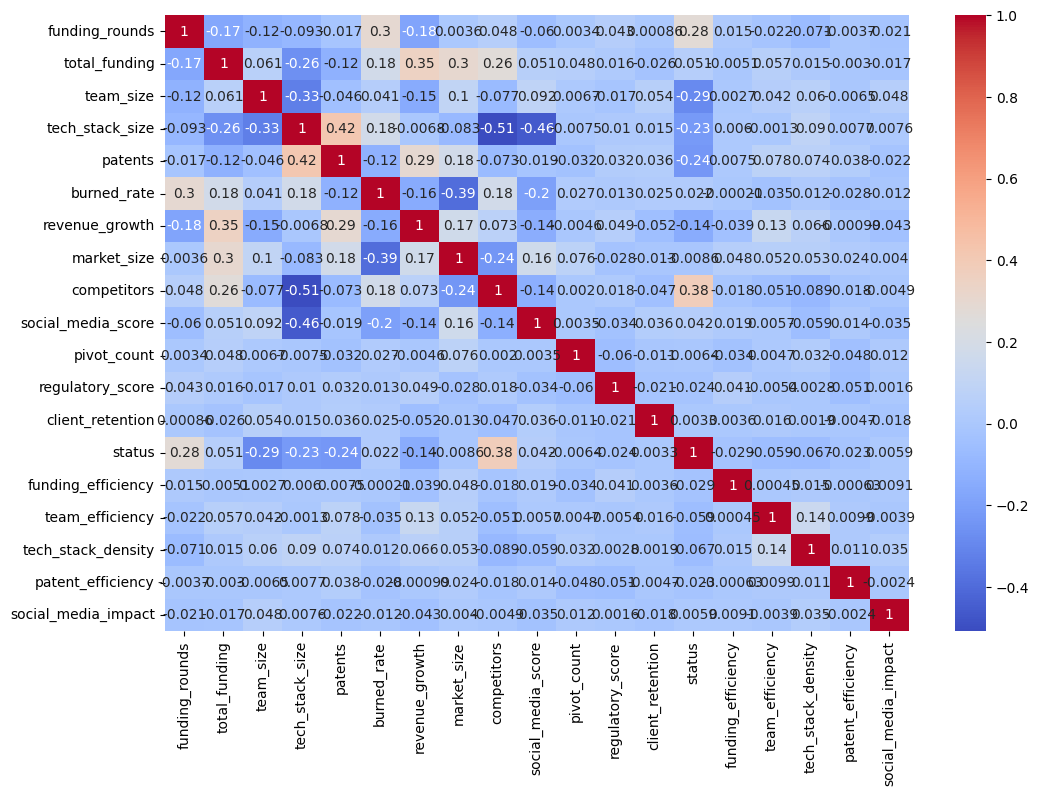

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Feature Importance

Feature Importances:
team_size: 0.1585
competitors: 0.0764
burned_rate: 0.0756
funding_rounds: 0.0726
tech_stack_size: 0.0723
tech_stack_density: 0.0677
patents: 0.0668
social_media_score: 0.0620
team_efficiency: 0.0604
market_size: 0.0569
revenue_growth: 0.0469
funding_efficiency: 0.0412
total_funding: 0.0370
social_media_impact: 0.0364
client_retention: 0.0213
regulatory_score: 0.0200
patent_efficiency: 0.0192
pivot_count: 0.0089


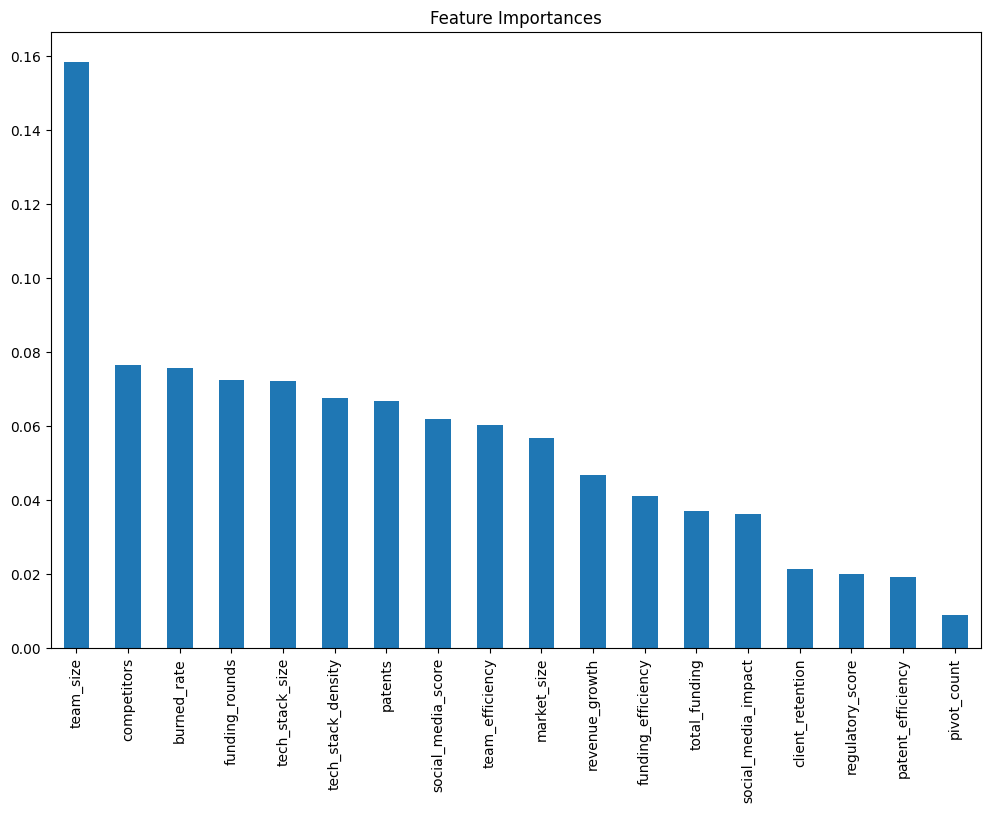

In [25]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Assuming 'status' is the target variable
X = df.drop('status', axis=1)
y = df['status']

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median of each column
X.fillna(X.median(), inplace=True)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

# Store feature importances in a variable
feature_importances_list = feature_importances.reset_index().values.tolist()

# Display feature importances
print("Feature Importances:")
for feature, importance in feature_importances_list:
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
feature_importances.plot(kind='bar', figsize=(12, 8))
plt.title('Feature Importances')
plt.show()

In [26]:
# List of features to drop based on importance scores
features_to_drop = ['pivot_count', 'patent_efficiency', 'regulatory_score', 'client_retention']

# Drop the selected features from the dataset
df_reduced = df.drop(columns=features_to_drop)

# Verify the changes
df_reduced.head()

funding_rounds  total_funding  team_size  tech_stack_size   patents  \
0        2.635789  -6.259407e+06       18.0        -0.188664  1.432129   
1        0.468051  -6.372538e+06       -6.0         6.393478  3.758335   
2        1.853692  -3.723211e+06        8.0         1.655535  1.993431   
3        1.690547   2.298397e+06       -6.0         3.026151  2.402553   
4       -2.089758   2.712542e+06      -36.0         2.337657  3.370167   

   burned_rate  revenue_growth   market_size  competitors  social_media_score  \
0     0.623095       -1.625289 -3.286777e+06     0.181854           -0.005083   
1    -2.712422        0.984511  9.778400e+04    -3.264116           -1.167660   
2     0.819204       -1.330146 -1.354409e+06     1.197189           -1.498869   
3     4.621623        2.071084 -2.371742e+06     0.446803            0.248394   
4    -4.097354        4.401355  3.225830e+06     1.007868           -0.094696   

   status  funding_efficiency  team_efficiency  tech_stack_density  \
0       2       -2.374775e+06        -0.090294           -0.010481   
1       0       -1.361505e+07        -0.164085           -1.065580   
2       1       -2.008538e+06        -0.166268            0.206942   
3       0        1.359558e+06        -0.345181           -0.504359   
4       2       -1.298017e+06        -0.122260           -0.064935   

   social_media_impact  
0            -0.004301  
1             0.515725  
2            -0.682175  
3             0.171685  
4            -0.047163

### Feature scaling

In [28]:
from sklearn.preprocessing import StandardScaler

# Assuming 'status' is the target variable
X = df_reduced.drop('status', axis=1)
y = df_reduced['status']

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median of each column
X.fillna(X.median(), inplace=True)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable back to the DataFrame
df_final = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Verify the changes
df_final.head()

funding_rounds  total_funding  team_size  tech_stack_size   patents  \
0        1.783477      -1.538894   0.399872        -0.249643  0.489250   
1        0.594842      -1.563879  -0.712429         1.889286  1.883540   
2        1.354631      -0.978774  -0.063587         0.349647  0.825685   
3        1.265173       0.351101  -0.712429         0.795041  1.070907   
4       -0.807681       0.442565  -2.102805         0.571309  1.650879   

   burned_rate  revenue_growth  market_size  competitors  social_media_score  \
0     0.367410       -1.792134    -1.789632     0.358046            0.063371   
1    -1.388614        0.019104     0.048709    -1.491656           -0.523069   
2     0.470654       -1.587300    -0.740057     0.903050           -0.690140   
3     2.472486        0.773201    -1.292626     0.500263            0.191233   
4    -2.117729        2.390443     1.747723     0.801427            0.018167   

   funding_efficiency  team_efficiency  tech_stack_density  \
0           -0.057759        -0.298950            0.050180   
1           -0.171656        -0.453832           -1.252110   
2           -0.054048        -0.458414            0.318541   
3           -0.019919        -0.833935           -0.559404   
4           -0.046848        -0.366044           -0.017031   

   social_media_impact  status  
0            -0.006715       2  
1             0.016381       0  
2            -0.036822       1  
3             0.001101       0  
4            -0.008619       2

### Handle Umbalance data

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'status' is the target variable
X = df_final.drop('status', axis=1)
y = df_final['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the changes
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())

Original class distribution:
status
0    598
1    252
2    150
Name: count, dtype: int64

Resampled class distribution:
status
1    472
0    472
2    472
Name: count, dtype: int64


## Models

- Descision Tree
- Random Forest

### Descision Tree

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Best model
best_rf = grid_search_rf.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test), multi_class='ovr')

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Feature Importances
feature_importances_rf = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances_rf.sort_values(ascending=False, inplace=True)
print("\nFeature Importances:\n", feature_importances_rf)

Random Forest Performance:
Accuracy: 0.8800
F1 Score: 0.8345
ROC-AUC: 0.9718

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       126
           1       0.79      0.86      0.83        44
           2       0.76      0.73      0.75        30

    accuracy                           0.88       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.88      0.88      0.88       200


Confusion Matrix:
 [[116   4   6]
 [  5  38   1]
 [  2   6  22]]

Feature Importances:
 team_size              0.128524
tech_stack_size        0.096762
competitors            0.096250
burned_rate            0.085894
tech_stack_density     0.083254
social_media_score     0.074860
patents                0.069477
funding_rounds         0.065576
market_size            0.060544
team_efficiency        0.057755
social_media_impact    0.052757
revenue_growth         0.050167
total_funding          0.040420
funding_effi

### XGBoost

In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model with early stopping
grid_search_xgb.fit(X_train_resampled, y_train_resampled, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
roc_auc_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test), multi_class='ovr')

print("XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Feature Importances
feature_importances_xgb = pd.Series(best_xgb.feature_importances_, index=X.columns)
feature_importances_xgb.sort_values(ascending=False, inplace=True)
print("\nFeature Importances:\n", feature_importances_xgb)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBoost Performance:
Accuracy: 0.8900
F1 Score: 0.8490
ROC-AUC: 0.9602

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       126
           1       0.83      0.86      0.84        44
           2       0.77      0.77      0.77        30

    accuracy                           0.89       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.89      0.89      0.89       200


Confusion Matrix:
 [[117   3   6]
 [  5  38   1]
 [  2   5  23]]

Feature Importances:
 team_size              0.148368
tech_stack_size        0.126502
tech_stack_density     0.083458
social_media_score     0.077639
burned_rate            0.075337
competitors            0.074438
funding_rounds         0.066529
funding_efficiency     0.066229
patents                0.065880
revenue_growth         0.061130
market_size            0.047397
total_funding          0.037957
team_efficiency        0.035821
social_media_impac

In [32]:
print("Comparison of Models:")
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1 Score: {f1_rf:.4f}, ROC-AUC: {roc_auc_rf:.4f}")
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}, F1 Score: {f1_xgb:.4f}, ROC-AUC: {roc_auc_xgb:.4f}")

Comparison of Models:
Random Forest - Accuracy: 0.8800, F1 Score: 0.8345, ROC-AUC: 0.9718
XGBoost - Accuracy: 0.8900, F1 Score: 0.8490, ROC-AUC: 0.9602


## Deployment

### Save Models

In [33]:
import joblib

# Save the best models
joblib.dump(best_rf, 'best_rf.pkl')
joblib.dump(best_xgb, 'best_xgb.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### ``Streamlit``

- Run the Streamlit App To run the Streamlit app, open a terminal or command prompt, navigate to the directory where app.py is saved, and run the following command:

```bach
streamlit run streamlit_app.py
```

### Results

![Description for Image 1](1.jpg)
![Description for Image 2](2.jpg)
![Description for Image 3](3.jpg)
![Description for Image 4](4.jpg)
![Description for Image 5](5.jpg)
![Description for Image 6](6.jpg)
![Description for Image 7](7.jpg)
